In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('sign_mnist_train.csv')

In [41]:
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape

(27455, 785)

In [5]:
labels = train['label'].values

In [6]:
classes ={y-64 : chr(y)  for y in range(65,91)}
classes

{1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

In [7]:
labels2=labels

In [8]:
train.drop('label', axis = 1,inplace=True)

In [9]:
labels.shape

(27455,)

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
labels.shape

(27455, 24)

In [13]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])


In [14]:
images.shape

(27455, 28, 28)

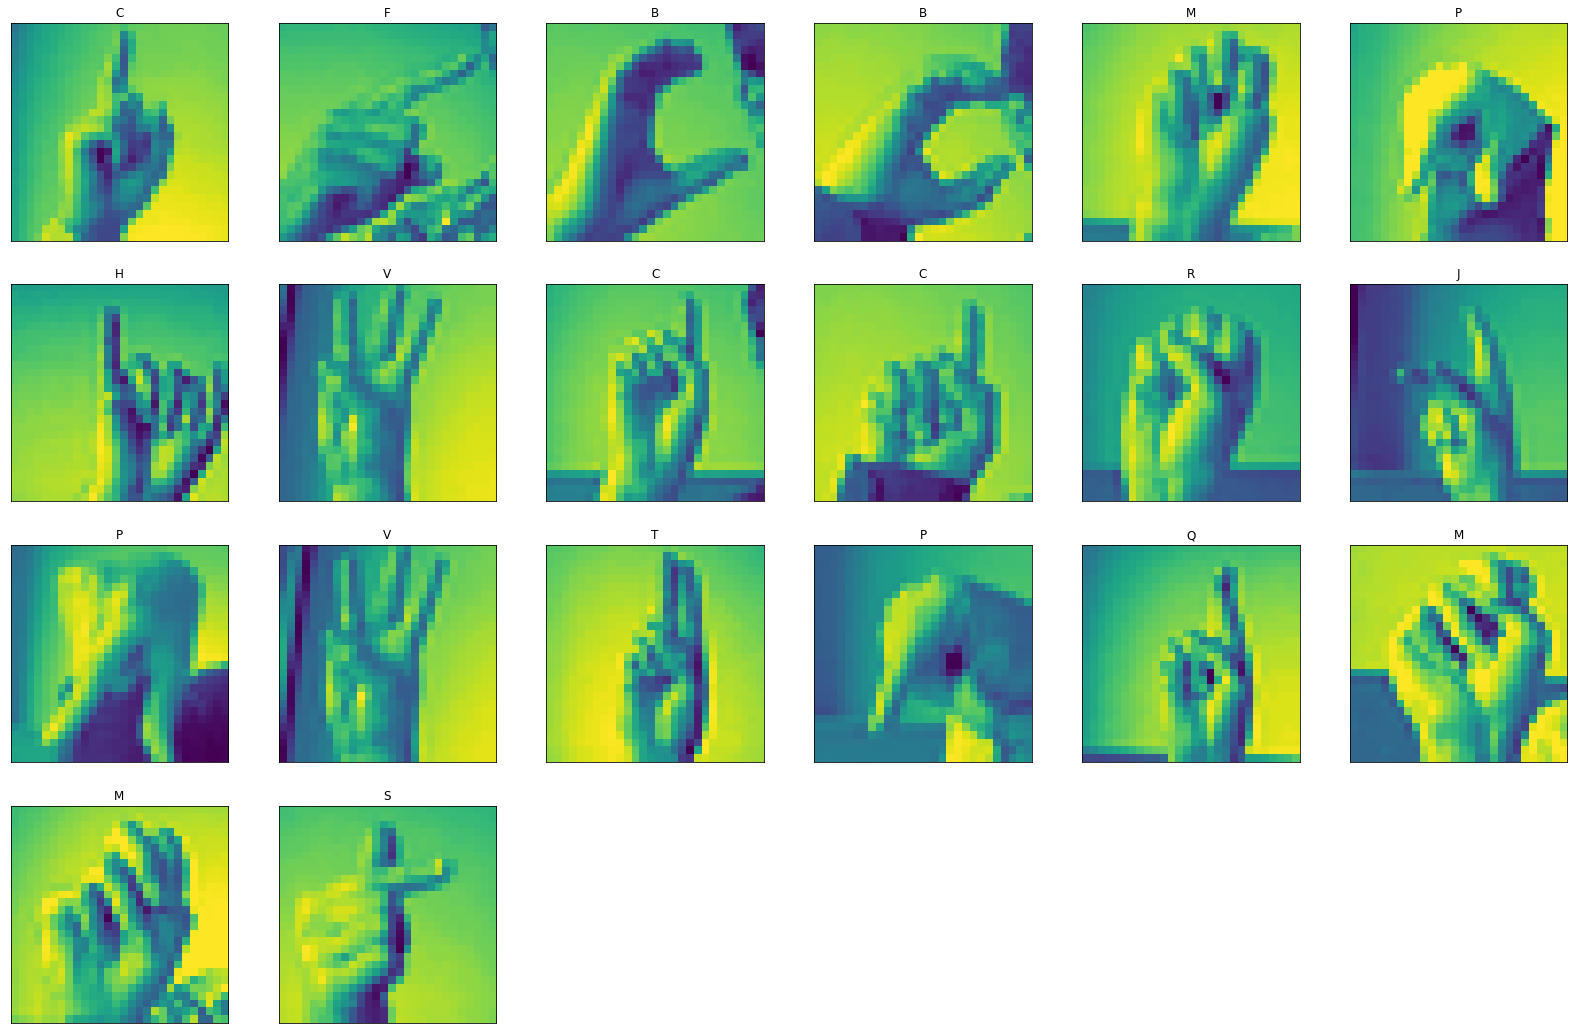

In [15]:
fig = plt.figure(figsize=(28, 28))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx])
    ax.set_title(classes[labels2[idx]])

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 0)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [88]:
batch_size = 64
num_classes = 24
epochs = 17

In [64]:
x_train = x_train /255 
x_train.shape

(19218, 28, 28)

In [65]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [66]:
x_train.shape

(19218, 28, 28, 1)

In [67]:
x_test = x_test / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [89]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [90]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [91]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/17
19218/19218 [==============================] - 50s 3ms/step - loss: 1.8014 - acc: 0.4302 - val_loss: 0.7469 - val_acc: 0.7554
Epoch 2/17
19218/19218 [==============================] - 47s 2ms/step - loss: 0.5110 - acc: 0.8289 - val_loss: 0.2488 - val_acc: 0.9278
Epoch 3/17
19218/19218 [==============================] - 48s 2ms/step - loss: 0.1990 - acc: 0.9376 - val_loss: 0.1036 - val_acc: 0.9764
Epoch 4/17
19218/19218 [==============================] - 47s 2ms/step - loss: 0.0868 - acc: 0.9751 - val_loss: 0.0428 - val_acc: 0.9904
Epoch 5/17
19218/19218 [==============================] - 47s 2ms/step - loss: 0.0397 - acc: 0.9908 - val_loss: 0.0204 - val_acc: 0.9968
Epoch 6/17
19218/19218 [==============================] - 47s 2ms/step - loss: 0.0226 - acc: 0.9948 - val_loss: 0.0236 - val_acc: 0.9941
Epoch 7/17
19218/19218 [==============================] - 47s 2ms/step - loss: 0.0145 - acc: 0.9972 - val_loss: 0.0024 - val_acc:

In [95]:
model.save('CNN_2.h5')

In [92]:
test = pd.read_csv('sign_mnist_test.csv')
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [93]:
y_pred = model.predict(test_images)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.9026770775237033